Enter the number of courses: 5
Enter the name of course 1: mt101
Enter the name of course 2: mt102
Enter the name of course 3: mt103
Enter the name of course 4: mt104
Enter the name of course 5: mt105
Enter the number of students: 10
Enter the names of students enrolled in mt101 (comma-separated): ali,jabbar,ahmad,eman,saif,aizaz,TH,BT
Enter the names of students enrolled in mt102 (comma-separated): ahmad,,TT,AA,BB,eman,saif,aizaz,TH,BT
Enter the names of students enrolled in mt103 (comma-separated): eman,saif,aizaz,DD
Enter the names of students enrolled in mt104 (comma-separated): ali,saif,ahmad,TT,AA,burhan
Enter the names of students enrolled in mt105 (comma-separated): ali,ahmad,eman,aizaz,saif,OO

Course Schedule:
mt101 assigned to Time Slot 1 (Color 0)
mt102 assigned to Time Slot 2 (Color 1)
mt103 assigned to Time Slot 3 (Color 2)
mt104 assigned to Time Slot 4 (Color 3)
mt105 assigned to Time Slot 5 (Color 4)


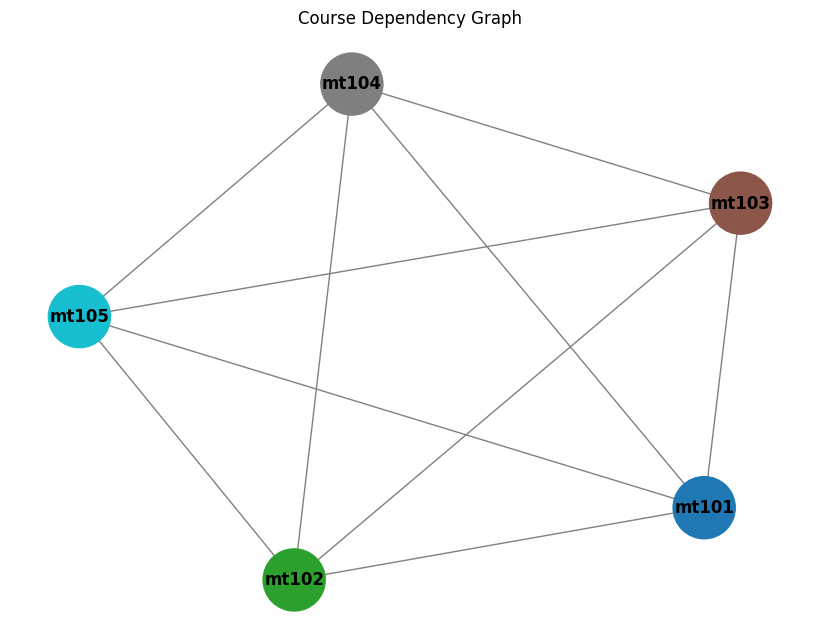

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

class CourseScheduler:
    def __init__(self, courses, enrollments):  # Fixing __init__ method
        self.courses = courses  # List of courses
        self.enrollments = enrollments  # Dictionary of students enrolled in each course
        self.graph = self.build_graph()

    def build_graph(self):
        graph = nx.Graph()
        for course in self.courses:
            graph.add_node(course)

        # Create edges based on shared enrollments
        for i in range(len(self.courses)):
            for j in range(i + 1, len(self.courses)):
                if set(self.enrollments[self.courses[i]]) & set(self.enrollments[self.courses[j]]):
                    graph.add_edge(self.courses[i], self.courses[j])

        return graph

    def greedy_coloring(self):
        coloring = nx.coloring.greedy_color(self.graph, strategy="largest_first")
        return coloring

    def visualize_graph(self, coloring):
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(self.graph)

        # Create a color map based on the coloring
        color_map = [coloring[course] for course in self.courses]
        unique_colors = list(set(color_map))
        colors = [plt.cm.tab10(color) for color in unique_colors]

        nx.draw(self.graph, pos, with_labels=True, node_color=color_map, font_weight='bold', node_size=2000, edge_color='gray', cmap=plt.cm.tab10)
        plt.title("Course Dependency Graph")
        plt.show()

def main():
    # Get number of courses
    num_courses = int(input("Enter the number of courses: "))
    courses = []

    for i in range(num_courses):
        course_name = input(f"Enter the name of course {i + 1}: ")
        courses.append(course_name)

    # Get number of students
    num_students = int(input("Enter the number of students: "))
    enrollments = {course: [] for course in courses}

    # Get enrollments for each course
    for course in courses:
        enrolled_students = input(f"Enter the names of students enrolled in {course} (comma-separated): ").split(',')
        enrollments[course] = [student.strip() for student in enrolled_students]

    # Initialize the scheduler
    scheduler = CourseScheduler(courses, enrollments)

    # Build the graph and perform coloring
    coloring = scheduler.greedy_coloring()

    # Output the course schedule with assigned colors
    print("\nCourse Schedule:")
    for course, color in coloring.items():
        print(f"{course} assigned to Time Slot {color + 1} (Color {color})")

    # Visualize the course dependency graph
    scheduler.visualize_graph(coloring)

if __name__ == "__main__":  # Fixing the __name__ special variable
    main()
